# US Public Schools Civil Rights Data Analysis

The dataset contains information on "educational achievement and opportunities in the US, broken down by race and school. For example, the dataset contains information the number of students of each racial group are enrolled in advanced classes in each school. Each row is a different school, and each column is an indicator of academic achievement."

Size: 5 rows × 1929 columns

Dataset and dictionary: [Download](https://catalog.data.gov/dataset/civil-rights-data-collection-2013-14)

Documentation [Download](http://ocrdata.ed.gov/Downloads/CRDC%202013-14%20Public%20Use%20Data%20File%20Users%20Manual.pdf)

#### Reading the Dataset

In [1]:
import pandas as pd
    
data = pd.read_csv("data/CRDC2013_14.csv",encoding="Latin-1")

data[:5]

/Users/iHijazi/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3,4,9,26,27,28,33,34,533,1926) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,LEA_STATE,LEA_NAME,SCH_NAME,COMBOKEY,LEAID,SCHID,JJ,CCD_LATCOD,CCD_LONCOD,NCES_SCHOOL_ID,...,SCH_FTE_TEACH_WOFED,SCH_SAL_TEACH_WOFED,SCH_NPE_WOFED,DSO_SCH_FTE_TEACH_WOFED,DSO_SCH_NPE_WOFED,DSO_SCH_SAL_INSTR_WOFED,DSO_SCH_SAL_TEACH_WOFED,SCH_JJTYPE,SCH_JJSYDAYS,SCH_JJHOURS
0,AL,ALABAMA YOUTH SERVICES,WALLACE SCH - MT MEIGS CAMPUS,10000201705,100002,1705,YES,32.3748,-86.0824,1.00002e+10,...,29.00,65000.00,139000.0,0,0,0,0,POST,220,35
1,AL,ALABAMA YOUTH SERVICES,MCNEEL SCH - VACCA CAMPUS,10000201706,100002,1706,YES,33.5867,-86.7106,1.00002e+10,...,21.00,473000.00,134000.0,0,0,0,0,POST,220,35
2,AL,ALA YOUTH SER,AUTAUGA CAMPUS,10000299995,100002,99995,YES,NaN,NaN,NaN,...,0.00,-9.00,102.0,0,0,0,0,POST,220,35
3,AL,ALBERTVILLE CITY,ALA AVENUE MIDDLE SCH,10000500870,100005,870,NO,34.2602,-86.2062,1.00005e+10,...,28.64,1441033.00,160221.0,0,0,0,0,-9,-9,-9
4,AL,ALBERTVILLE CITY,ALBERTVILLE HIGH SCH,10000500871,100005,871,NO,34.2622,-86.2049,1.00005e+10,...,57.64,3018949.56,1011572.0,0,0,0,0,-9,-9,-9


#### How many schools are juvenile justice facilities and magnet schools?

In [2]:
print("Total Number of Schools: ",len(data))
print("Juvenile Justice: ", data["JJ"][data["JJ"] == 'YES'].count())
print("Magnet Schools:", data["SCH_STATUS_MAGNET"][data["SCH_STATUS_MAGNET"] == 'YES'].count())

Total Number of Schools:  95507
Juvenile Justice:  633
Magnet Schools: 3749


#### How many male and female students are in juvenile justice facilities?

In [3]:
print("Juvenile Justice")
print("Males: ", data["TOT_ENR_M"][data["JJ"] == 'YES'].sum())
print("Females: ", data["TOT_ENR_F"][data["JJ"] == 'YES'].sum())
print("==================")
print("Magnet Schools")
print("Males: ", data["TOT_ENR_M"][data["SCH_STATUS_MAGNET"] == 'YES'].sum())
print("Females: ", data["TOT_ENR_F"][data["SCH_STATUS_MAGNET"] == 'YES'].sum())

#You may used also pivot table:
# print(data.pivot_table(values=["TOT_ENR_M", "TOT_ENR_F"],index="JJ",aggfunc="sum"))
#print(data.pivot_table(values=["TOT_ENR_M", "TOT_ENR_F"],index="SCH_STATUS_MAGNET",aggfunc="sum"))

Juvenile Justice
Males:  34890
Females:  5791
Magnet Schools
Males:  1516973
Females:  1503234


#### What is the sum of total_enrollment column?

In [4]:
data["total_enrollment"] = data["TOT_ENR_M"] + data["TOT_ENR_F"]
all_enrollment = data["total_enrollment"].sum(axis=0)
print("Total Number of Enrollment:" ,all_enrollment)

Total Number of Enrollment: 50035666


#### Racial Groups and Rate of Enrollment

- HI= Hispanic
- AM= American Indian/Alaska Native*
- AS= Asian*
- HP= Native Hawaiian/Pacific Islander*
- BL= Black*
- WH= WHITE*
- TR= Two or More Races*

In [5]:
## Divide the sums of the columns by all_enrollment to figure out what percentage of enrollment each 
## race/gender group is
racial_group = ["WH","BL","AS","AM","HP","HI","TR"]
gender = ["F","M"]

for rac in racial_group:
    for gen in gender:
        col = "SCH_ENR" + "_" + rac + "_" + gen
        print(col, ": ",data[col].sum(axis=0) / all_enrollment * 100,"%")

SCH_ENR_WH_F :  24.3309062779 %
SCH_ENR_WH_M :  25.9679405486 %
SCH_ENR_BL_F :  7.5745229413 %
SCH_ENR_BL_M :  7.92295239959 %
SCH_ENR_AS_F :  2.36808679633 %
SCH_ENR_AS_M :  2.45814255775 %
SCH_ENR_AM_F :  0.553970841519 %
SCH_ENR_AM_M :  0.582732325378 %
SCH_ENR_HP_F :  0.213201918807 %
SCH_ENR_HP_M :  0.225882873229 %
SCH_ENR_HI_F :  12.0614483277 %
SCH_ENR_HI_M :  12.6780345044 %
SCH_ENR_TR_F :  1.51016277069 %
SCH_ENR_TR_M :  1.5509556723 %


#### Visualizations

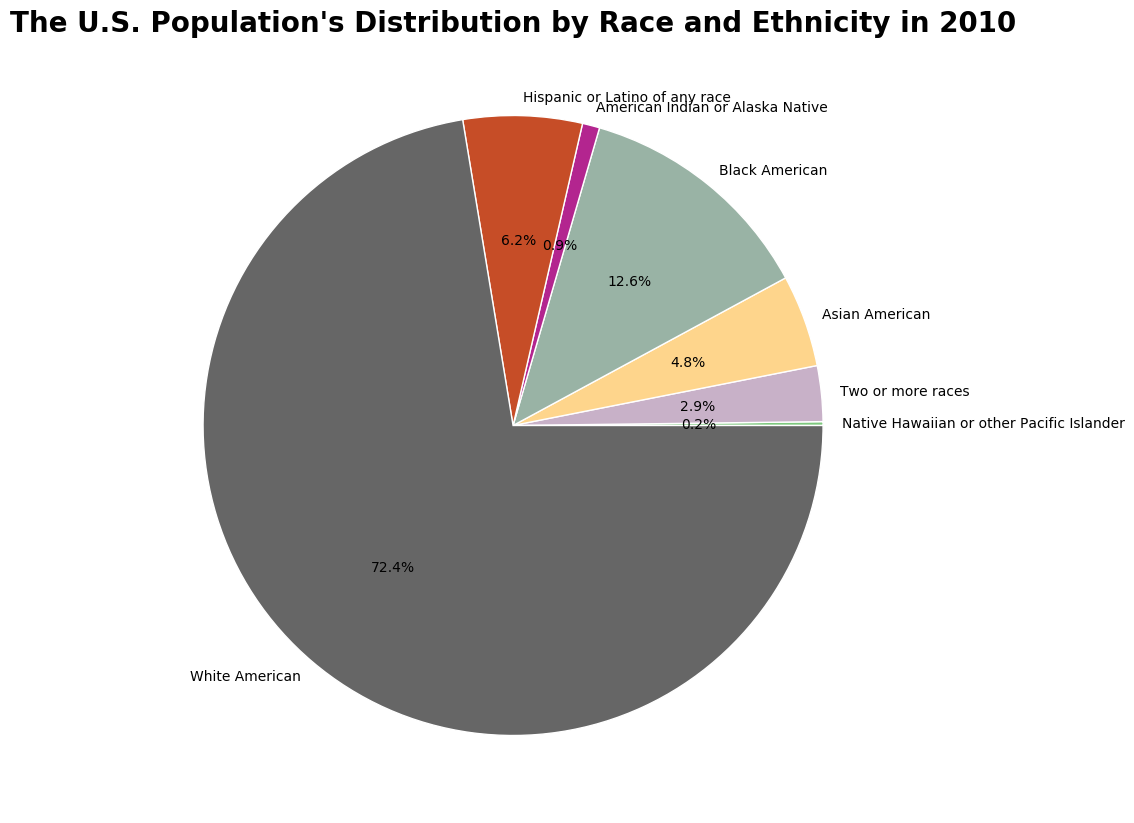

In [6]:
## The U.S. Population's Distribution by Race and Ethnicity in 2010

import numpy as np
import matplotlib.pyplot as plt
from random import shuffle

slices = [72.4,12.6,4.8,0.9,0.2,6.2,2.9]

labels = ["White American","Black American","Asian American","American Indian or Alaska Native",
         "Native Hawaiian or other Pacific Islander","Hispanic or Latino of any race","Two or more races"]

slices, labels = zip(*sorted(zip(slices,labels)))
    
large = slices[:int(len(slices) / 2)]
small = slices[int(len(slices) / 2):]

labels_l = labels[:int(len(labels) / 2)]
labels_s = labels[int(len(labels) / 2):]

reordered = large[::2] + small[::2] + large[1::2] + small[1::2]
labels_re = labels_l[::2] + labels_s[::2] + labels_l[1::2] + labels_s[1::2]
    
cmap = plt.cm.Accent
colors = cmap(np.linspace(0., 01., len(labels_re)))

fig = plt.figure(figsize=[10, 10])

ax = fig.add_subplot(111)

pie_wedge_collection = ax.pie(reordered, colors=colors, labels=labels_re, labeldistance=1.06,autopct='%1.1f%%')

for pie_wedge in pie_wedge_collection[0]:
    pie_wedge.set_edgecolor('white')
    
    
title_format = {'fontsize': 20, 'fontweight' :'bold','horizontalalignment':'center'}

ax.set_title("The U.S. Population's Distribution by Race and Ethnicity in 2010",fontdict=title_format)

plt.show()

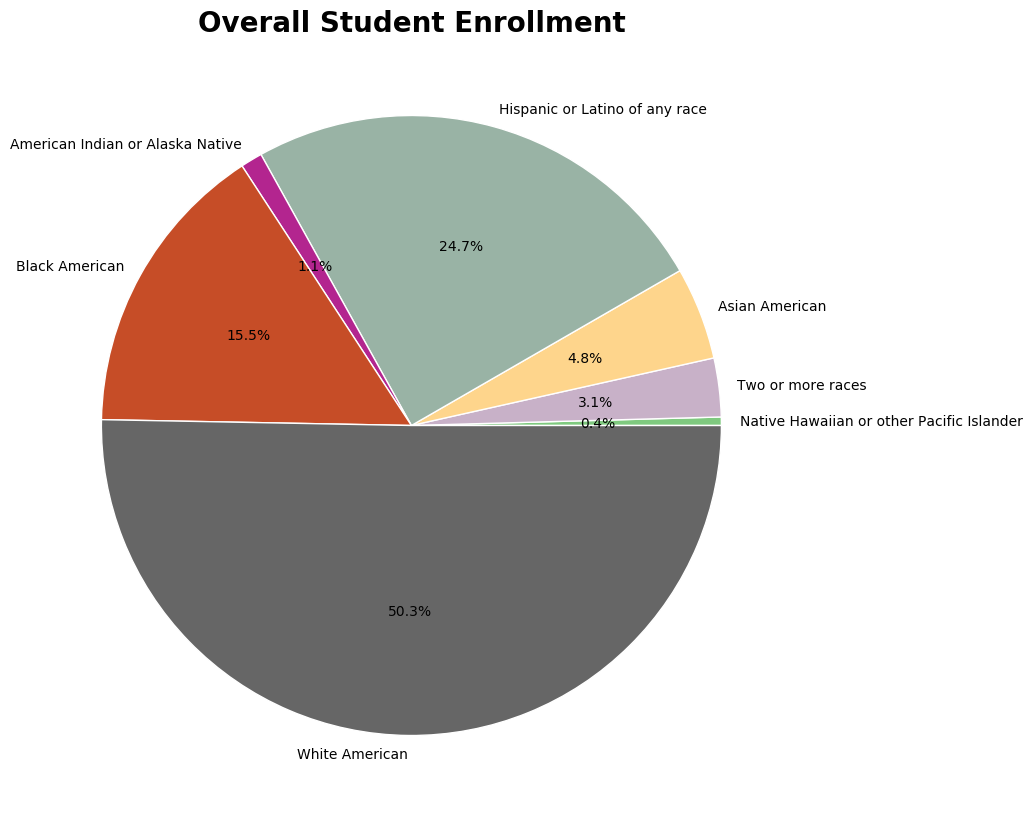

In [7]:
## Overall Student Enrollment

tot_enroll = []

for rac in racial_group:   
    col_m = "SCH_ENR" + "_" + rac + "_M"
    col_f = "SCH_ENR" + "_" + rac + "_F"
    sum_gender = (data[col_m].sum(axis=0) + data[col_f].sum(axis=0)) / all_enrollment
    tot_enroll.append(sum_gender)


labels = ["White American","Black American","Asian American","American Indian or Alaska Native",
         "Native Hawaiian or other Pacific Islander","Hispanic or Latino of any race","Two or more races"]

slices, labels = zip(*sorted(zip(tot_enroll,labels)))
    
large = slices[:int(len(slices) / 2)]
small = slices[int(len(slices) / 2):]

labels_l = labels[:int(len(labels) / 2)]
labels_s = labels[int(len(labels) / 2):]

reordered = large[::2] + small[::2] + large[1::2] + small[1::2]
labels_re = labels_l[::2] + labels_s[::2] + labels_l[1::2] + labels_s[1::2]
    
cmap = plt.cm.Accent
colors = cmap(np.linspace(0., 01., len(labels_re)))

fig = plt.figure(figsize=[10, 10])

ax = fig.add_subplot(111)

pie_wedge_collection = ax.pie(reordered, colors=colors, labels=labels_re, labeldistance=1.06,autopct='%1.1f%%')

for pie_wedge in pie_wedge_collection[0]:
    pie_wedge.set_edgecolor('white')
    
title_format = {'fontsize': 20, 'fontweight' :'bold','horizontalalignment':'center'}


ax.set_title("Overall Student Enrollment",fontdict=title_format)

plt.show()

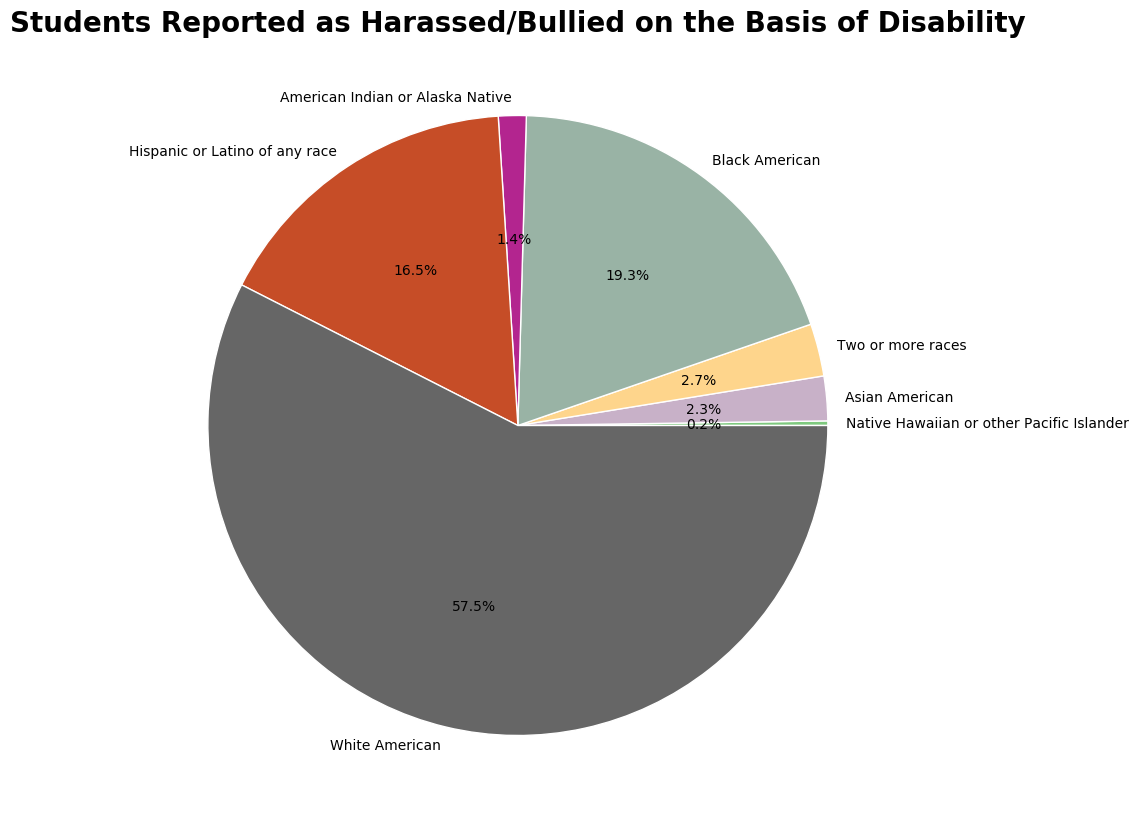

In [8]:
## Students Reported as Harassed/Bullied on the Basis of Disability

data["total_dis"] = data["TOT_HBREPORTED_DIS_M"] + data["TOT_HBREPORTED_DIS_F"]
total_dis = data["total_dis"][data["total_dis"] > 0].sum()

total_of = []

for rac in racial_group:
    col_m = "SCH_HBREPORTED_DIS" + "_" + rac + "_M"
    col_f = "SCH_HBREPORTED_DIS" + "_" + rac + "_F"
    sum_of = (data[col_m][data[col_m] > 0].sum(axis=0) + data[col_f][data[col_f] > 0].sum(axis=0)) / total_dis
    total_of.append(float(sum_of))
    
    
labels = ["White American","Black American","Asian American","American Indian or Alaska Native",
         "Native Hawaiian or other Pacific Islander","Hispanic or Latino of any race","Two or more races"]

slices, labels = zip(*sorted(zip(total_of,labels)))
    
large = slices[:int(len(slices) / 2)]
small = slices[int(len(slices) / 2):]

labels_l = labels[:int(len(labels) / 2)]
labels_s = labels[int(len(labels) / 2):]

reordered = large[::2] + small[::2] + large[1::2] + small[1::2]
labels_re = labels_l[::2] + labels_s[::2] + labels_l[1::2] + labels_s[1::2]
    
cmap = plt.cm.Accent
colors = cmap(np.linspace(0., 01., len(labels_re)))

fig = plt.figure(figsize=[10, 10])

ax = fig.add_subplot(111)

pie_wedge_collection = ax.pie(reordered, colors=colors, labels=labels_re, labeldistance=1.06,autopct='%1.1f%%')

for pie_wedge in pie_wedge_collection[0]:
    pie_wedge.set_edgecolor('white')
    
    
title_format = {'fontsize': 20, 'fontweight' :'bold','horizontalalignment':'center'}

ax.set_title("Students Reported as Harassed/Bullied on the Basis of Disability",fontdict=title_format)

plt.show()

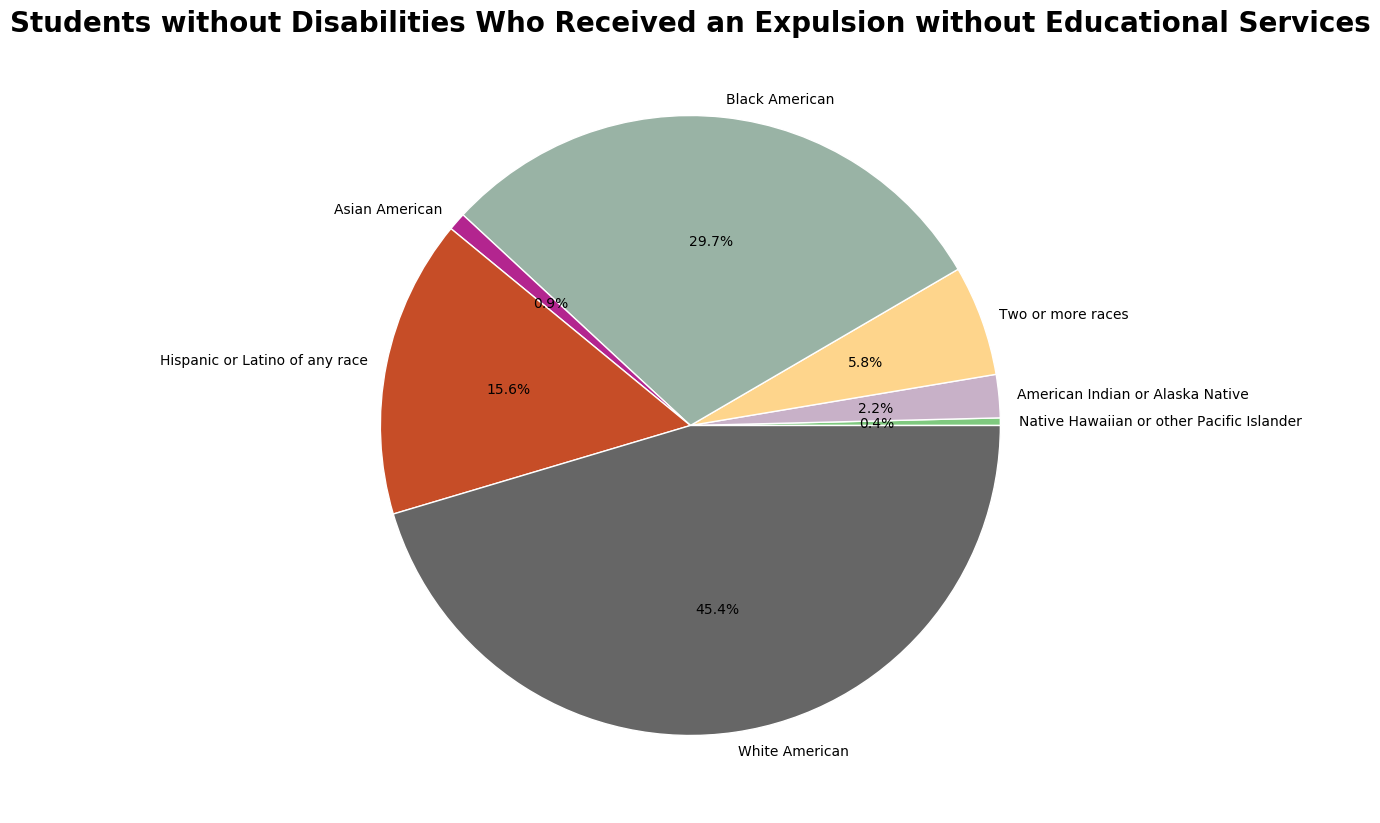

In [9]:
## Students without Disabilities Who Received an Expulsion without Educational Services

data["total_exp"] = data["TOT_DISCWODIS_EXPWOE_M"] + data["TOT_DISCWODIS_EXPWOE_F"]
total_exp = data["total_exp"][data["total_exp"] > 0].sum()

total_of = []

for rac in racial_group:
    col_m = "SCH_DISCWODIS_EXPWOE" + "_" + rac + "_M"
    col_f = "SCH_DISCWODIS_EXPWOE" + "_" + rac + "_F"
    sum_of = (data[col_m][data[col_m] > 0].sum(axis=0) + data[col_f][data[col_f] > 0].sum(axis=0)) / total_exp
    total_of.append(float(sum_of))
    
labels = ["White American","Black American","Asian American","American Indian or Alaska Native",
         "Native Hawaiian or other Pacific Islander","Hispanic or Latino of any race","Two or more races"]


slices, labels = zip(*sorted(zip(total_of,labels)))
    
large = slices[:int(len(slices) / 2)]
small = slices[int(len(slices) / 2):]

labels_l = labels[:int(len(labels) / 2)]
labels_s = labels[int(len(labels) / 2):]

reordered = large[::2] + small[::2] + large[1::2] + small[1::2]
labels_re = labels_l[::2] + labels_s[::2] + labels_l[1::2] + labels_s[1::2]
    
cmap = plt.cm.Accent
colors = cmap(np.linspace(0., 01., len(labels_re)))

fig = plt.figure(figsize=[10, 10])

ax = fig.add_subplot(111)

pie_wedge_collection = ax.pie(reordered, colors=colors, labels=labels_re, labeldistance=1.06,autopct='%1.1f%%')

for pie_wedge in pie_wedge_collection[0]:
    pie_wedge.set_edgecolor('white')
    
    
title_format = {'fontsize': 20, 'fontweight' :'bold','horizontalalignment':'center'}

ax.set_title("Students without Disabilities Who Received an Expulsion without Educational Services",fontdict=title_format)

plt.show()

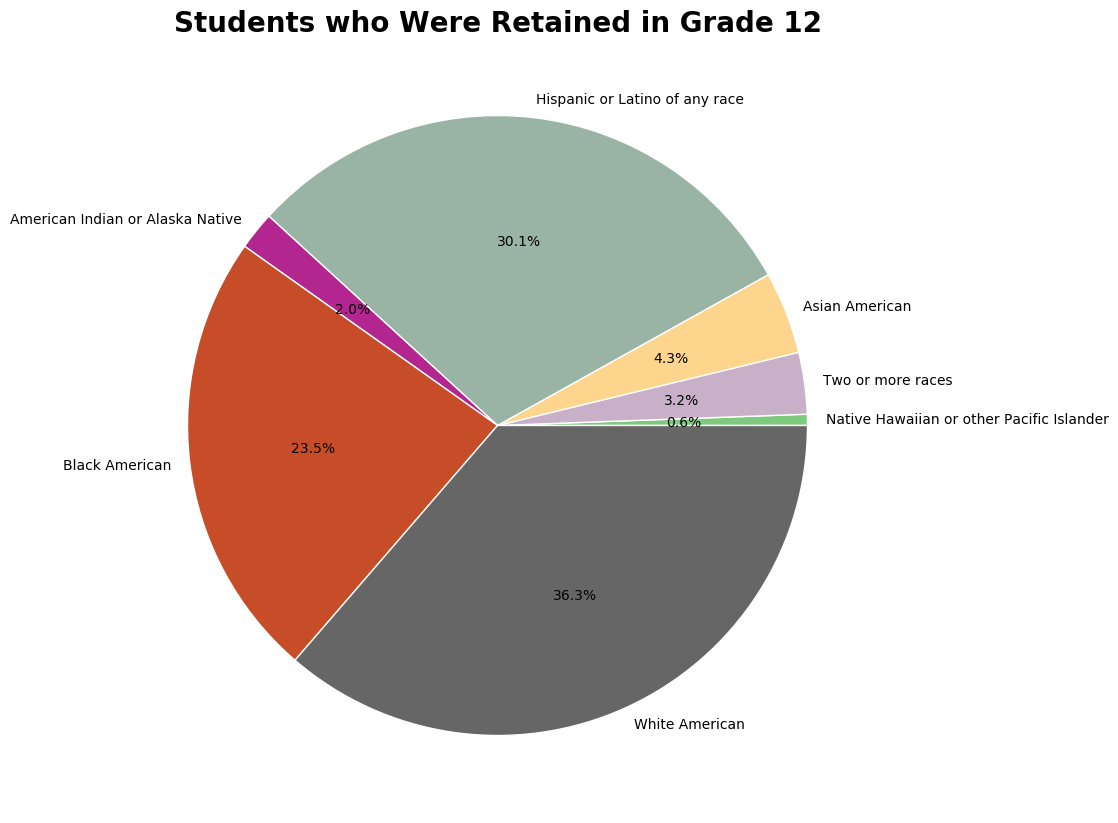

In [10]:
## Students who Were Retained in Grade 12

data["total_ret12"] = data["TOT_RET_G12_M"] + data["TOT_RET_G12_F"]
total_ret12 = data["total_ret12"][data["total_ret12"] > 0].sum()

total_of = []

for rac in racial_group:
    col_m = "SCH_RET_G12" + "_" + rac + "_M"
    col_f = "SCH_RET_G12" + "_" + rac + "_F"
    sum_of = (data[col_m][data[col_m] > 0].sum(axis=0) + data[col_f][data[col_f] > 0].sum(axis=0)) / total_ret12
    total_of.append(float(sum_of))
    
labels = ["White American","Black American","Asian American","American Indian or Alaska Native",
         "Native Hawaiian or other Pacific Islander","Hispanic or Latino of any race","Two or more races"]


slices, labels = zip(*sorted(zip(total_of,labels)))
    
large = slices[:int(len(slices) / 2)]
small = slices[int(len(slices) / 2):]

labels_l = labels[:int(len(labels) / 2)]
labels_s = labels[int(len(labels) / 2):]

reordered = large[::2] + small[::2] + large[1::2] + small[1::2]
labels_re = labels_l[::2] + labels_s[::2] + labels_l[1::2] + labels_s[1::2]
    
cmap = plt.cm.Accent
colors = cmap(np.linspace(0., 01., len(labels_re)))

fig = plt.figure(figsize=[10, 10])

ax = fig.add_subplot(111)

pie_wedge_collection = ax.pie(reordered, colors=colors, labels=labels_re, labeldistance=1.06,autopct='%1.1f%%')

for pie_wedge in pie_wedge_collection[0]:
    pie_wedge.set_edgecolor('white')
    
title_format = {'fontsize': 20, 'fontweight' :'bold','horizontalalignment':'center'}

ax.set_title("Students who Were Retained in Grade 12",fontdict=title_format)

plt.show()

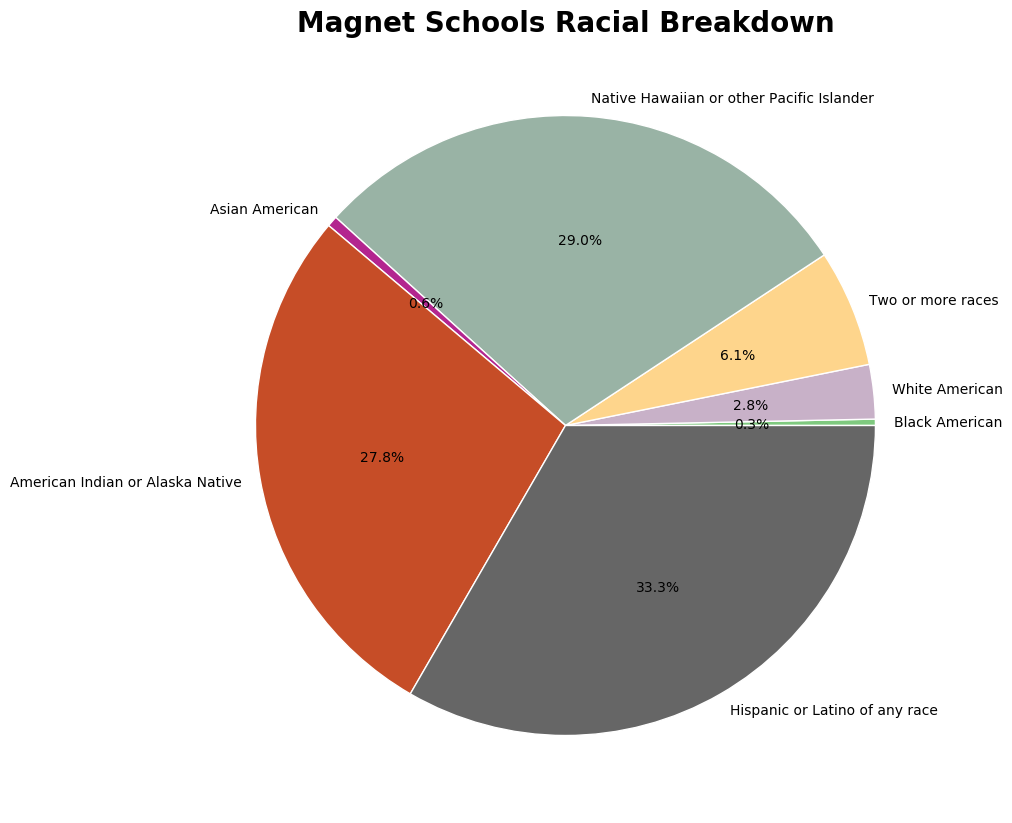

In [11]:
## Magnet Schools Racial Breakdown

sum_enrol_magnet = data["TOT_ENR_M"][data["SCH_STATUS_MAGNET"] == 'YES'].sum() + data["TOT_ENR_F"][data["SCH_STATUS_MAGNET"] == 'YES'].sum()

tot_enroll = []

for rac in racial_group:
    col_m = "SCH_ENR" + "_" + rac + "_M"
    col_f = "SCH_ENR" + "_" + rac + "_F"
    sum_gender = (data[col_m][data["SCH_STATUS_MAGNET"] == "YES"].sum(axis=0) + data[col_f][data["SCH_STATUS_MAGNET"] == "YES"].sum(axis=0)) / sum_enrol_magnet
    tot_enroll.append(sum_gender)
    
slices, labels = zip(*sorted(zip(tot_enroll,labels)))
    
large = slices[:int(len(slices) / 2)]
small = slices[int(len(slices) / 2):]

labels_l = labels[:int(len(labels) / 2)]
labels_s = labels[int(len(labels) / 2):]

reordered = large[::2] + small[::2] + large[1::2] + small[1::2]
labels_re = labels_l[::2] + labels_s[::2] + labels_l[1::2] + labels_s[1::2]
    
cmap = plt.cm.Accent
colors = cmap(np.linspace(0., 01., len(labels_re)))

fig = plt.figure(figsize=[10, 10])

ax = fig.add_subplot(111)

pie_wedge_collection = ax.pie(reordered, colors=colors, labels=labels_re, labeldistance=1.06,autopct='%1.1f%%')

for pie_wedge in pie_wedge_collection[0]:
    pie_wedge.set_edgecolor('white')

title_format = {'fontsize': 20, 'fontweight' :'bold','horizontalalignment':'center'}
    
ax.set_title("Magnet Schools Racial Breakdown",fontdict=title_format)

plt.show()

---
---
# That's it

But there are hundreds of questions that can be asked and answered. Why don't you try it yourself?

Prepared by Issam Hijazi

https://ae.linkedin.com/in/ihijazi

@iHijazi